# DIGHUM 101 - project name

## Files: 
- Fox News
- Huffington Post
- Yahoo! News
- Breitbart News
- New York Times

In [ ]:
##try not lowering things first

## Install libraries

In [ ]:
#pip install wordcloud

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sn

## Import files

In [2]:
foxnews = open("/Users/sehyunhwang/Desktop/dh-project/foxnews_1.txt").read()
huffpost = open("/Users/sehyunhwang/Desktop/dh-project/huffpost_1.txt").read()
yahoo = open("/Users/sehyunhwang/Desktop/dh-project/yahoo_1.txt").read()
breitbart = open("/Users/sehyunhwang/Desktop/dh-project/breitbart_1.txt").read()
nytimes = open("/Users/sehyunhwang/Desktop/dh-project/nytimes_1.txt").read()

## Clean Data

### > Convert to lowercase
This step will be bypassed to conserve the structure of the proper nouns included in the texts.

### > Remove punctuation

In [3]:
from string import punctuation

In [4]:
#foxnews
for char in punctuation:
    foxnews_lower = foxnews.replace(char, "")

#huffpost
for char in punctuation:
    huffpost.replace(char, "")

#yahoo
for char in punctuation:
    yahoo.replace(char, "")
    
#breitbart
for char in punctuation:
    breitbart.replace(char, "")
    
#nytimes
for char in punctuation:
    nytimes.replace(char, "")

### > Tokenize data

In [5]:
from nltk import word_tokenize

In [60]:
foxnews_tokens = foxnews.split()
huffpost_tokens = huffpost.split()
yahoo_tokens = yahoo.split()
breitbart_tokens = breitbart.split()
nytimes_tokens = nytimes.split()
nytimes_tokens

['Donald',
 'Trump',
 'Is',
 'Elected',
 'President',
 'in',
 'Stunning',
 'Repudiation',
 'of',
 'the',
 'Establishment',
 'Video',
 'Donald',
 'John',
 'Trump',
 'was',
 'elected',
 'the',
 '45th',
 'president',
 'of',
 'the',
 'United',
 'States',
 'on',
 'Tuesday',
 'in',
 'a',
 'stunning',
 'culmination',
 'of',
 'an',
 'explosive,',
 'populist',
 'and',
 'polarizing',
 'campaign',
 'that',
 'took',
 'relentless',
 'aim',
 'at',
 'the',
 'institutions',
 'and',
 'long-held',
 'ideals',
 'of',
 'American',
 'democracy.',
 'The',
 'surprise',
 'outcome,',
 'defying',
 'late',
 'polls',
 'that',
 'showed',
 'Hillary',
 'Clinton',
 'with',
 'a',
 'modest',
 'but',
 'persistent',
 'edge,',
 'threatened',
 'convulsions',
 'throughout',
 'the',
 'country',
 'and',
 'the',
 'world,',
 'where',
 'skeptics',
 'had',
 'watched',
 'with',
 'alarm',
 'as',
 'Mr.',
 'Trump’s',
 'unvarnished',
 'overtures',
 'to',
 'disillusioned',
 'voters',
 'took',
 'hold.',
 'The',
 'triumph',
 'for',
 'Mr.'

### > Remove stopwords

In [7]:
from nltk.corpus import stopwords

In [97]:
foxnews_nostops = [word for word in foxnews_tokens if word not in stopwords.words('english')]
huffpost_nostops = [word for word in huffpost_tokens if word not in stopwords.words('english')]
yahoo_nostops = [word for word in yahoo_tokens if word not in stopwords.words('english')]
breitbart_nostops = [word for word in breitbart_tokens if word not in stopwords.words('english')]
nytimes_nostops = [word for word in nytimes_tokens if word not in stopwords.words('english')]

In [9]:
len(foxnews_nostops)

631

### > Lemmatization

In [10]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import spacy 
nlp = spacy.load('en_core_web_lg')

`lemmatize_function` takes in a list of tokens and lemmatizes each item

In [98]:
def lemmatizer_function(tokens):
    words = ' '.join(tokens)
    doc = nlp(words)
    return [token.lemma_ for token in doc]

In [99]:
foxnews_lemm = lemmatizer_function(foxnews_nostops)
huffpost_lemm = lemmatizer_function(huffpost_nostops)
yahoo_lemm = lemmatizer_function(yahoo_nostops)
breitbart_lemm = lemmatizer_function(breitbart_nostops)
nytimes_lemm = lemmatizer_function(nytimes_nostops)

### > Removing extra punctuation

In [100]:
def remove_punct2(tokens_list):
    lemm_tokens = tokens_list
    for token in lemm_tokens:
        if token in punctuation:
            lemm_tokens.remove(token)
        if token.isdigit():
            lemm_tokens.remove(token)
    return lemm_tokens

In [101]:
#foxnews_lemm[:] = [x for x in foxnews_lemm if x != "-PRON-"]
ff = [x for x in foxnews_lemm if x not in ["-PRON-", '"', '“', "’s", ",","…", ".", "-","’", "’","―","–","—","—", "’"]]
f = [x for x in ff if x not in punctuation]
#huffpost_lemm[:] = [x for x in huffpost_lemm if x != "-PRON-"]
hh = [x for x in huffpost_lemm if x not in ["-PRON-", '"', '“', "’s", ",","…", ".", "-","’", "’","―","–","—","—", "’"]]
h = [x for x in hh if x not in punctuation]
#yahoo_lemm[:] = [x for x in yahoo_lemm if x != "-PRON-"]
yy = [x for x in yahoo_lemm if x not in ["-PRON-", '"', '“', "’s", ",","…", ".", "-","’", "’","―","–","—","—", "’"]]
y = [x for x in yy if x not in punctuation]
#breitbart_lemm[:] = [x for x in breitbart_lemm if x != "-PRON-"]
bb = [x for x in breitbart_lemm if x not in ["-PRON-", '"', '“', "’s", ",","…", ".", "-","’", "’","―","–","—","—", "’"]]
b = [x for x in bb if x not in punctuation]
#nytimes_lemm[:] = [x for x in nytimes_lemm if x != "-PRON-"]
nn = [x for x in nytimes_lemm if x not in ["-PRON-", '"', '“', "’s", ",","…", ".", "-","’", "’","―","–","—","—", "’"]]
n = [x for x in nn if x not in punctuation]

### > Parts of Speech

In [15]:
from nltk import pos_tag

In [102]:
#foxnews
foxnews_pos = pos_tag(f)
foxnews_dataframe = pd.DataFrame(foxnews_pos)
foxnews_dataframe.columns = ["Vocab", "POS"]
#splice out numbers
foxnews_dataframe_cut = foxnews_dataframe.sort_values("Vocab")[5:]
foxnews_dataframe_cut.head()

,Vocab,POS
118,America,NNP
95,Americans,NNPS
332,Anthony,NNP
228,Carolina,NNP
66,City,NNP


In [103]:
#huffpost

huffpost_pos = pos_tag(h)
huffpost_dataframe = pd.DataFrame(huffpost_pos)
huffpost_dataframe.columns = ["Vocab", "POS"]
#splice out numbers
huffpost_dataframe_cut =huffpost_dataframe.sort_values("Vocab")[3:]
huffpost_dataframe_cut.head()

,Vocab,POS
0,America,NNP
180,America,NNP
336,America,NNP
456,Americans,NNPS
338,Blame,NNP


In [45]:
#yahoo
yahoo_pos = pos_tag(y)
yahoo_dataframe = pd.DataFrame(yahoo_pos)
yahoo_dataframe.columns = ["Vocab", "POS"]
#splice out numbers
yahoo_dataframe_cut = yahoo_dataframe.sort_values("Vocab")[7:]
yahoo_dataframe_cut.head()

,Vocab,POS
26,America,NNP
237,America,NNP
605,Apprentice,NNP
12,Associated,NNP
198,Brexit,VB


In [47]:
#nytimes
nytimes_pos = pos_tag(n)
nytimes_dataframe = pd.DataFrame(nytimes_pos)
nytimes_dataframe.columns = ["Vocab", "POS"]
#splice out numbers
nytimes_dataframe_cut = nytimes_dataframe.sort_values("Vocab")[10:]
nytimes_dataframe_cut.head()

,Vocab,POS
183,America,NNP
288,America,NNP
450,America,NNP
618,Americans,NNPS
138,Avenue,NNP


In [48]:
#breitbart
breitbart_pos = pos_tag(b)
breitbart_dataframe = pd.DataFrame(breitbart_pos)
breitbart_dataframe.columns = ["Vocab", "POS"]
#splice out numbers
breitbart_dataframe_cut = breitbart_dataframe.sort_values("Vocab")[3:]
breitbart_dataframe_cut.head()

,Vocab,POS
0,AP,NNP
152,America,NNP
11,America,NNP
159,Americans,NNPS
141,Americans,NNPS


## Visualizations

## > Distribution of POS

In [49]:
#foxnews
foxnews_posdist = foxnews_dataframe.groupby("POS").count()
foxnews_posdist["POS"] = foxnews_posdist.index
foxnews_posdist.columns = ['counts', 'POS']


AxesSubplot(0.125,0.125;0.775x0.755)


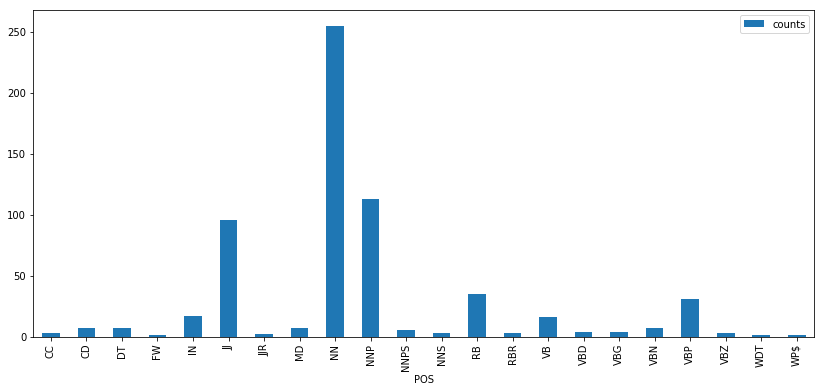

In [50]:
print(foxnews_posdist.plot(kind='bar', rot=90, figsize = (14, 6)));

#sn.barplot(x = "POS", y = "counts", data = a)
#plt.bar(a["POS"], a["counts"])
#plt.xlabel("POS");
#plt.ylabel("counts");
#plt.figure(figsize=(400,400));

In [ ]:
b = huffpost_dataframe.groupby("POS").count()
b["POS"] = b.index
b.columns = ['counts', 'POS']

b.plot(kind='bar', rot=90, figsize = (14, 6));

In [203]:
pos_df2 = foxnews_dataframe.groupby("POS").count().merge(huffpost_dataframe.groupby("POS").count(), on = "POS")
pos_df3 = pos_df2.merge(yahoo_dataframe.groupby("POS").count(), on = "POS")
pos_df4 = pos_df3.merge(nytimes_dataframe.groupby("POS").count(), on = "POS")
pos_df5 = pos_df4.merge(breitbart_dataframe.groupby("POS").count(), on = "POS")
pos_df5.columns = ["foxnews", "huffpost", "yahoo", "nytimes", "breitbart"]
pos_df5

,foxnews,huffpost,yahoo,nytimes,breitbart
POS,,,,,
CD,7,5,14,21,6
DT,7,11,10,7,4
IN,17,14,21,34,6
JJ,96,98,102,175,52
MD,7,4,11,4,3
NN,255,177,273,367,138
NNP,113,47,116,167,64
NNPS,5,3,6,6,4
NNS,3,4,4,6,1


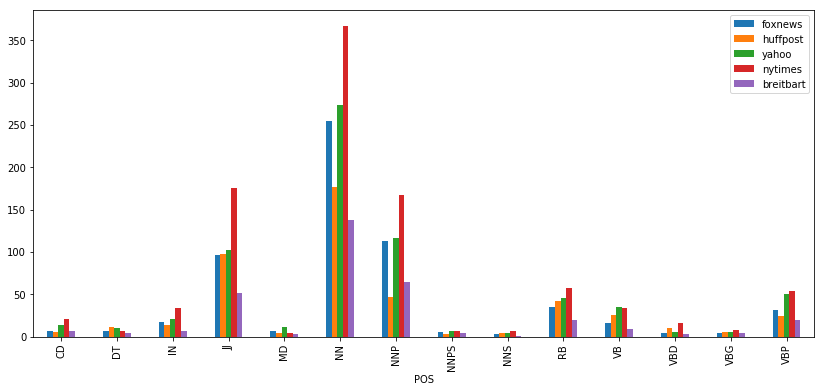

In [204]:

pos_df5.plot(kind='bar', rot=90, figsize = (14, 6));

,Vocab,POS
0,Trump,NNP
1,win,VBP
2,presidency,NN
3,defeat,NN
4,Clinton,NNP
5,historic,JJ
6,election,NN
7,upset,VBN
8,Donald,NNP
9,Trump,NNP


### > Word Cloud
Showing the top 25 frequent words used in each article.

In [51]:
def to_string(tokens): 
    string = ""
    for i in tokens:
        string = string + " " +i
    return string

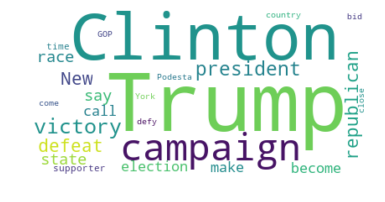

In [115]:
from wordcloud import WordCloud

#foxnews
wordcloud_fox = WordCloud(max_words = 25, background_color = "white", collocations=False).generate(to_string(foxnews_dataframe_cut["Vocab"]))
plt.imshow(wordcloud_fox, interpolation='bilinear')
plt.axis("off")
plt.show;


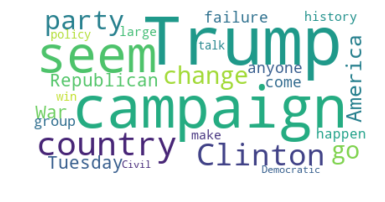

In [116]:
#huffpost
wordcloud_huff = WordCloud(max_words = 25, background_color = "white", collocations=False).generate(to_string(huffpost_dataframe_cut["Vocab"]))
plt.imshow(wordcloud_huff, interpolation='bilinear')
plt.axis("off")
plt.show;

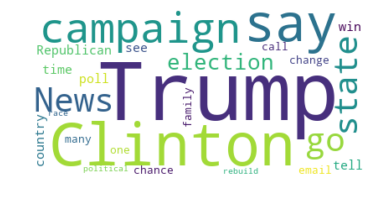

In [120]:
#yahoo
wordcloud_yahoo = WordCloud(max_words = 25, background_color = "white", collocations=False).generate(to_string(yahoo_dataframe_cut["Vocab"]))
plt.imshow(wordcloud_yahoo, interpolation='bilinear')
plt.axis("off")
plt.show;

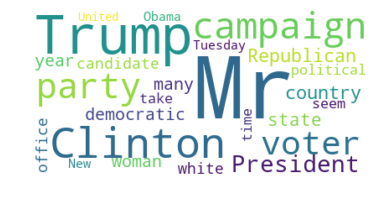

In [121]:
#nytimes
wordcloud_nytimes = WordCloud(max_words = 25, background_color = "white", collocations=False).generate(to_string(nytimes_dataframe_cut["Vocab"]))
plt.imshow(wordcloud_nytimes, interpolation='bilinear')
plt.axis("off")
plt.show;

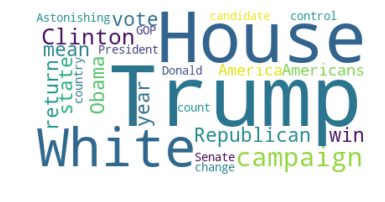

In [122]:
#breitbart
wordcloud_breitbart = WordCloud(max_words = 25, background_color = "white", collocations=False).generate(to_string(breitbart_dataframe_cut["Vocab"]))
plt.imshow(wordcloud_breitbart, interpolation='bilinear')
plt.axis("off")
plt.show;

What about all of the text?

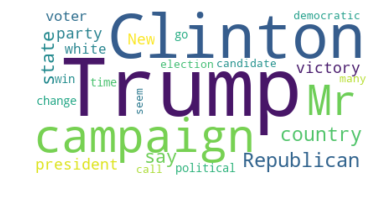

In [125]:
all_text = to_string(breitbart_dataframe_cut["Vocab"]) + to_string(yahoo_dataframe_cut["Vocab"]) + to_string(nytimes_dataframe_cut["Vocab"]) + to_string(huffpost_dataframe_cut["Vocab"]) + to_string(foxnews_dataframe_cut["Vocab"])
wordcloud_all_text = WordCloud(max_words = 25, background_color = "white", collocations = False).generate(all_text)
plt.imshow(wordcloud_all_text, interpolation='bilinear')
plt.axis("off")
plt.show;

If we take out the three most frequent words (clinton, trump, campaign) from the word cloud: 

In [137]:
def removeword(lemm_list, words):
    keep = []
    for i in lemm_list.split():
        if i not in words:
            keep.append(i)
    return to_string(keep)

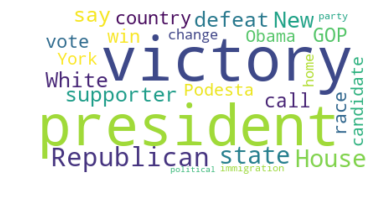

In [213]:

all_text_edited = removeword(all_text, ["Clinton", "Trump", "campaign"])
wordcloud_all_text_nobig3 = WordCloud(max_words = 25, background_color = "white", collocations= False).generate(all_text_edited)
plt.imshow(wordcloud_all_text_nobig3, interpolation='bilinear')
plt.axis("off")
plt.show;
#wordcloud_all_text_nobig3.to_file("alltext_nobig3_15.png");

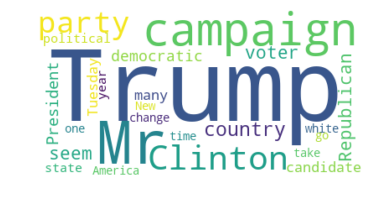

In [232]:
liberal_text = to_string(nytimes_dataframe_cut["Vocab"]) + to_string(huffpost_dataframe_cut["Vocab"])
wordcloud_liberal = WordCloud(max_words = 25, background_color = "white", collocations= False).generate(liberal_text)
plt.imshow(wordcloud_liberal, interpolation='bilinear')
plt.axis("off")
plt.show;

In [240]:
wordcloud_conservative.to_file("conservative_25.png");

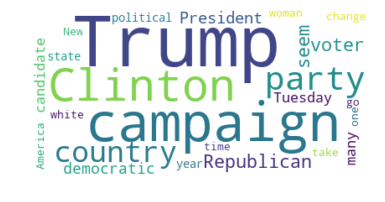

In [237]:
liberal_text_edited = to_string([x for x in liberal_text.split() if x not in ["Mr.", "Mrs."]])
wordcloud_liberal_edited = WordCloud(max_words = 25, background_color = "white", collocations= False).generate(liberal_text_edited)
plt.imshow(wordcloud_liberal_edited, interpolation='bilinear')
plt.axis("off")
plt.show;          


In [230]:
#liberal_textt = [x for x in liberal_text.split() if x != "Mr." and x != "Mrs."]
Counter(to_string(liberal_textt).split()).most_common()[:10]


[('Trump', 36),
 ('campaign', 19),
 ('Clinton', 18),
 ('country', 13),
 ('the', 13),
 ('seem', 11),
 ('voter', 11),
 ('party', 10),
 ('and', 9),
 ('Tuesday', 7)]

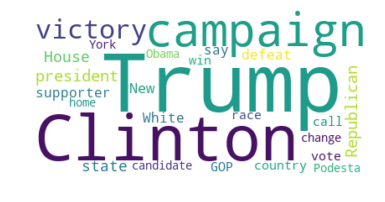

In [179]:
conservative_text = to_string(breitbart_dataframe_cut["Vocab"]) +  to_string(foxnews_dataframe_cut["Vocab"])
wordcloud_conservative = WordCloud(max_words = 25, background_color = "white", collocations= False).generate(conservative_text)
plt.imshow(wordcloud_conservative, interpolation='bilinear')
plt.axis("off")
plt.show;

In [177]:
from collections import Counter

In [186]:
Counter(conservative_text.split()).most_common()[:10]

[('Trump', 25),
 ('Clinton', 19),
 ('campaign', 14),
 ('victory', 10),
 ('House', 8),
 ('president', 7),
 ('state', 7),
 ('say', 6),
 ('supporter', 6),
 ('the', 6)]

As expected, the combination of all the text seem to combine to create a neutral spread of words.
World cloud seems to show ____. 
But what if we focus on the parts of speech?

### Calculate sentiment for vocab and add to dataframe

In [268]:
def return_compoundscore(column):
    ee = []
    for i in column: 
        ee.append(i["compound"])
    return ee

In [270]:
#foxnews
foxnews_dataframe["Sentiment"] = foxnews_dataframe["Vocab"].apply(sid.polarity_scores)
foxnews_dataframe["Compound Sentiment"] = return_compoundscore(foxnews_dataframe["Sentiment"])

#huffpost
huffpost_dataframe["Sentiment"] = huffpost_dataframe["Vocab"].apply(sid.polarity_scores)
huffpost_dataframe["Compound Sentiment"] = return_compoundscore(huffpost_dataframe["Sentiment"])

#yahoo
yahoo_dataframe["Sentiment"] = yahoo_dataframe["Vocab"].apply(sid.polarity_scores)
yahoo_dataframe["Compound Sentiment"] = return_compoundscore(yahoo_dataframe["Sentiment"])

#nytimes
nytimes_dataframe["Sentiment"] = nytimes_dataframe["Vocab"].apply(sid.polarity_scores)
nytimes_dataframe["Compound Sentiment"] = return_compoundscore(nytimes_dataframe["Sentiment"])

#breitbart
breitbart_dataframe["Sentiment"] = breitbart_dataframe["Vocab"].apply(sid.polarity_scores)
breitbart_dataframe["Compound Sentiment"] = return_compoundscore(breitbart_dataframe["Sentiment"])

In [271]:
#fd2 = foxnews_dataframe.reset_index().drop('index', axis=1)
#fd2.head()

### > Overall sentiment

In [277]:
def neg_pos(all_list):
    neg = 0
    pos = 0
    for i in all_list:
        if i <= 0: 
            neg += i
        elif i >= 0: 
            pos += i
    return [neg, pos]

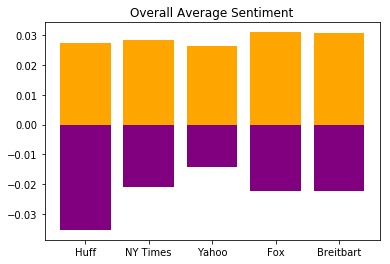

In [321]:
#huffpost
plt.bar(["Huff"],avg_neg_pos(huffpost_dataframe["Compound Sentiment"])[0], color = "purple")
plt.bar(["Huff"],avg_neg_pos(huffpost_dataframe["Compound Sentiment"])[1], color = "orange")
#nytimes
plt.bar(["NY Times"],avg_neg_pos(nytimes_dataframe["Compound Sentiment"])[0], color = "purple")
plt.bar(["NY Times"],avg_neg_pos(nytimes_dataframe["Compound Sentiment"])[1], color = "orange")
#yahoo
plt.bar(["Yahoo"],avg_neg_pos(yahoo_dataframe["Compound Sentiment"])[0], color = "purple")
plt.bar(["Yahoo"],avg_neg_pos(yahoo_dataframe["Compound Sentiment"])[1], color = "orange")
#foxnews 
plt.bar(["Fox"],avg_neg_pos(foxnews_dataframe["Compound Sentiment"])[0], color = "purple")
plt.bar(["Fox"],avg_neg_pos(foxnews_dataframe["Compound Sentiment"])[1], color = "orange")
#breitbart
plt.bar(["Breitbart"],avg_neg_pos(breitbart_dataframe["Compound Sentiment"])[0], color = "purple")
plt.bar(["Breitbart"],avg_neg_pos(breitbart_dataframe["Compound Sentiment"])[1], color = "orange")

plt.title("Overall Average Sentiment");
#plt.savefig('overall-avgcomp.png')

### > Analysis by POS

In [362]:
def avg_neg_pos(all_list):
    neg = 0
    neg_count = 0
    pos = 0
    pos_count = 0
    for i in all_list:
        if i <= 0: 
            neg += i
            neg_count += 1
        elif i >= 0: 
            pos += i
            pos_count += 1
    if neg_count == 0:
        avgneg = 0
        avgpos = pos/pos_count
    if pos_count == 0:
        avgpos = 0
        avgneg = neg/neg_count
    else:
        avgneg = neg/neg_count
        avgpos = pos/pos_count
    return [avgneg, avgpos]
            

In [313]:
def pos_df(df, pos_list):
    agg = df[df["POS"] == pos_list[0]]
    for i in pos_list[1:]:
        agg.append(df[df["POS"] == i])
    return agg

In [364]:
foxnews_adj = pos_df(foxnews_dataframe, ['JJ', 'JJR', 'JJS']).drop_duplicates("Vocab")
huffpost_adj = pos_df(huffpost_dataframe,['JJ', 'JJR', 'JJS']).drop_duplicates("Vocab")
yahoo_adj = pos_df(huffpost_dataframe,['JJ', 'JJR', 'JJS']).drop_duplicates("Vocab")
nytimes_adj = pos_df(huffpost_dataframe,['JJ', 'JJR', 'JJS']).drop_duplicates("Vocab")
breitbart_adj = pos_df(huffpost_dataframe,['JJ', 'JJR', 'JJS']).drop_duplicates("Vocab")

In [380]:
from matplotlib.ticker import ScalarFormatter

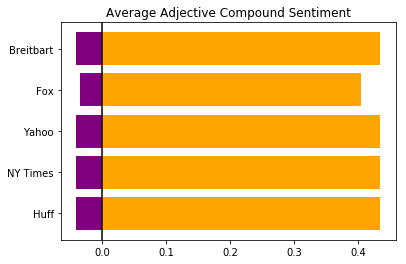

In [410]:
#huff
plt.barh(["Huff"],avg_neg_pos(huffpost_adj["Compound Sentiment"])[0], color = "purple")
plt.barh(["Huff"],avg_neg_pos(huffpost_adj["Compound Sentiment"])[1], color = "orange")

#nytimes
plt.barh(["NY Times"],avg_neg_pos(nytimes_adj["Compound Sentiment"])[0], color = "purple")
plt.barh(["NY Times"],avg_neg_pos(nytimes_adj["Compound Sentiment"])[1], color = "orange")
#yahoo
plt.barh(["Yahoo"],avg_neg_pos(yahoo_adj["Compound Sentiment"])[0], color = "purple")
plt.barh(["Yahoo"],avg_neg_pos(yahoo_adj["Compound Sentiment"])[1], color = "orange")
#foxnews 
plt.barh(["Fox"],avg_neg_pos(foxnews_adj["Compound Sentiment"])[0], color = "purple")
plt.barh(["Fox"],avg_neg_pos(foxnews_adj["Compound Sentiment"])[1], color = "orange")
#breitbart
plt.barh(["Breitbart"],avg_neg_pos(breitbart_adj["Compound Sentiment"])[0], color = "purple")
plt.barh(["Breitbart"],avg_neg_pos(breitbart_adj["Compound Sentiment"])[1], color = "orange")

#display
plt.title("Average Adjective Compound Sentiment")
plt.axvline(x=0, color = "black")
plt.savefig('adj_avgcomp.png');

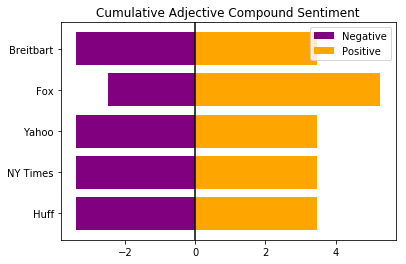

In [409]:
#huff
plt.barh(["Huff"],neg_pos(huffpost_adj["Compound Sentiment"])[0], color = "purple", label = "Negative")
plt.barh(["Huff"],neg_pos(huffpost_adj["Compound Sentiment"])[1], color = "orange", label = "Positive")

#nytimes
plt.barh(["NY Times"],neg_pos(nytimes_adj["Compound Sentiment"])[0], color = "purple")
plt.barh(["NY Times"],neg_pos(nytimes_adj["Compound Sentiment"])[1], color = "orange")
#yahoo
plt.barh(["Yahoo"],neg_pos(yahoo_adj["Compound Sentiment"])[0], color = "purple")
plt.barh(["Yahoo"],neg_pos(yahoo_adj["Compound Sentiment"])[1], color = "orange")
#foxnews 
plt.barh(["Fox"],neg_pos(foxnews_adj["Compound Sentiment"])[0], color = "purple")
plt.barh(["Fox"],neg_pos(foxnews_adj["Compound Sentiment"])[1], color = "orange")
#breitbart
plt.barh(["Breitbart"],neg_pos(breitbart_adj["Compound Sentiment"])[0], color = "purple")
plt.barh(["Breitbart"],neg_pos(breitbart_adj["Compound Sentiment"])[1], color = "orange")

#display
plt.title("Cumulative Adjective Compound Sentiment")
plt.legend()
plt.axvline(x=0, color = "black")
plt.savefig('adj_sumcomp.png');

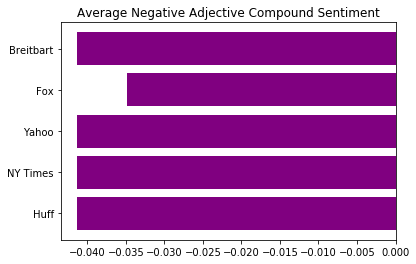

In [406]:
from matplotlib.ticker import ScalarFormatter
#huff
plt.barh(["Huff"],avg_neg_pos(huffpost_adj["Compound Sentiment"])[0], color = "purple")

#nytimes
plt.barh(["NY Times"],avg_neg_pos(nytimes_adj["Compound Sentiment"])[0], color = "purple")

#yahoo
plt.barh(["Yahoo"],avg_neg_pos(yahoo_adj["Compound Sentiment"])[0], color = "purple")

#foxnews 
plt.barh(["Fox"],avg_neg_pos(foxnews_adj["Compound Sentiment"])[0], color = "purple")

#breitbart
plt.barh(["Breitbart"],avg_neg_pos(breitbart_adj["Compound Sentiment"])[0], color = "purple")

#display
plt.title("Average Negative Adjective Compound Sentiment")

plt.savefig('adj_avgnegcomp.png');

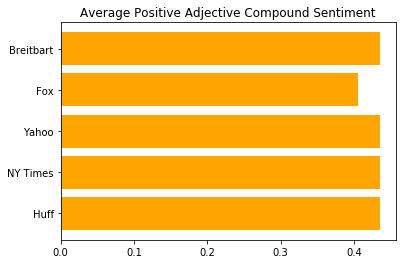

In [407]:
#huff
#plt.barh(["Huff"],avg_neg_pos(huffpost_adj["Compound Sentiment"])[0], color = "purple")
plt.barh(["Huff"],avg_neg_pos(huffpost_adj["Compound Sentiment"])[1], color = "orange")

#nytimes
#plt.barh(["NY Times"],avg_neg_pos(nytimes_adj["Compound Sentiment"])[0], color = "purple")
plt.barh(["NY Times"],avg_neg_pos(nytimes_adj["Compound Sentiment"])[1], color = "orange")
#yahoo
#plt.barh(["Yahoo"],avg_neg_pos(yahoo_adj["Compound Sentiment"])[0], color = "purple")
plt.barh(["Yahoo"],avg_neg_pos(yahoo_adj["Compound Sentiment"])[1], color = "orange")
#foxnews 
#plt.barh(["Fox"],avg_neg_pos(foxnews_adj["Compound Sentiment"])[0], color = "purple")
plt.barh(["Fox"],avg_neg_pos(foxnews_adj["Compound Sentiment"])[1], color = "orange")
#breitbart
#plt.barh(["Breitbart"],avg_neg_pos(breitbart_adj["Compound Sentiment"])[0], color = "purple")
plt.barh(["Breitbart"],avg_neg_pos(breitbart_adj["Compound Sentiment"])[1], color = "orange")

#display
plt.title("Average Positive Adjective Compound Sentiment")

plt.savefig('adj_avgposcomp.png');

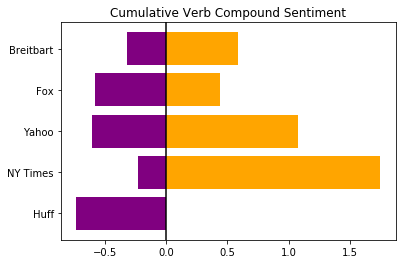

In [411]:
#huff
huffpost_verb = pos_df(huffpost_dataframe, ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
plt.barh(["Huff"],neg_pos(huffpost_verb["Compound Sentiment"])[0], color = "purple")
plt.barh(["Huff"],neg_pos(huffpost_verb["Compound Sentiment"])[1], color = "orange")
#nytimes
nytimes_verb = pos_df(nytimes_dataframe,["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
plt.barh(["NY Times"],neg_pos(nytimes_verb["Compound Sentiment"])[0], color = "purple")
plt.barh(["NY Times"],neg_pos(nytimes_verb["Compound Sentiment"])[1], color = "orange")
#yahoo
yahoo_verb = pos_df(yahoo_dataframe,["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
plt.barh(["Yahoo"],neg_pos(yahoo_verb["Compound Sentiment"])[0], color = "purple")
plt.barh(["Yahoo"],neg_pos(yahoo_verb["Compound Sentiment"])[1], color = "orange")
#foxnews 
foxnews_verb = pos_df(foxnews_dataframe,["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
plt.barh(["Fox"],neg_pos(foxnews_verb["Compound Sentiment"])[0], color = "purple")
plt.barh(["Fox"],neg_pos(foxnews_verb["Compound Sentiment"])[1], color = "orange")
#breitbart
breitbart_verb = pos_df(breitbart_dataframe,["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
plt.barh(["Breitbart"],neg_pos(breitbart_verb["Compound Sentiment"])[0], color = "purple")
plt.barh(["Breitbart"],neg_pos(breitbart_verb["Compound Sentiment"])[1], color = "orange")
plt.axvline(x=0, color = "black")
#display
plt.title("Cumulative Verb Compound Sentiment");
plt.savefig('verb_sumcomp.png');

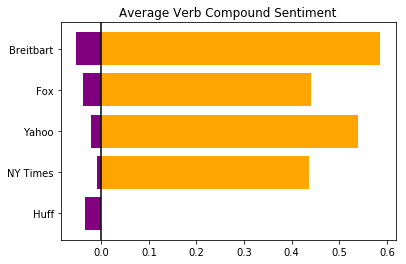

In [412]:
#huff
huffpost_verb = pos_df(huffpost_dataframe, ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
plt.barh(["Huff"],avg_neg_pos(huffpost_verb["Compound Sentiment"])[0], color = "purple")
plt.barh(["Huff"],avg_neg_pos(huffpost_verb["Compound Sentiment"])[1], color = "orange")
#nytimes
nytimes_verb = pos_df(nytimes_dataframe,["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
plt.barh(["NY Times"],avg_neg_pos(nytimes_verb["Compound Sentiment"])[0], color = "purple")
plt.barh(["NY Times"],avg_neg_pos(nytimes_verb["Compound Sentiment"])[1], color = "orange")
#yahoo
yahoo_verb = pos_df(yahoo_dataframe,["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
plt.barh(["Yahoo"],avg_neg_pos(yahoo_verb["Compound Sentiment"])[0], color = "purple")
plt.barh(["Yahoo"],avg_neg_pos(yahoo_verb["Compound Sentiment"])[1], color = "orange")
#foxnews 
foxnews_verb = pos_df(foxnews_dataframe,["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
plt.barh(["Fox"],avg_neg_pos(foxnews_verb["Compound Sentiment"])[0], color = "purple")
plt.barh(["Fox"],avg_neg_pos(foxnews_verb["Compound Sentiment"])[1], color = "orange")
#breitbart
breitbart_verb = pos_df(breitbart_dataframe,["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
plt.barh(["Breitbart"],avg_neg_pos(breitbart_verb["Compound Sentiment"])[0], color = "purple")
plt.barh(["Breitbart"],avg_neg_pos(breitbart_verb["Compound Sentiment"])[1], color = "orange")
plt.axvline(x=0, color = "black")
#display
plt.title("Average Verb Compound Sentiment");
plt.savefig('verb_avgcomp.png');

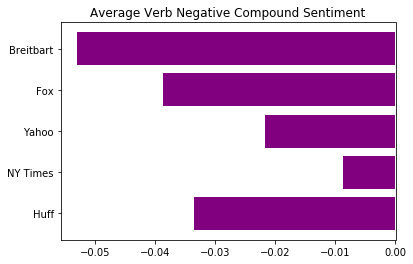

In [401]:
#huff
huffpost_verb = pos_df(huffpost_dataframe, ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
plt.barh(["Huff"],avg_neg_pos(huffpost_verb["Compound Sentiment"])[0], color = "purple")
#plt.barh(["Huff"],avg_neg_pos(huffpost_verb["Compound Sentiment"])[1], color = "orange")
#nytimes
nytimes_verb = pos_df(nytimes_dataframe,["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
plt.barh(["NY Times"],avg_neg_pos(nytimes_verb["Compound Sentiment"])[0], color = "purple")
#plt.barh(["NY Times"],avg_neg_pos(nytimes_verb["Compound Sentiment"])[1], color = "orange")
#yahoo
yahoo_verb = pos_df(yahoo_dataframe,["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
plt.barh(["Yahoo"],avg_neg_pos(yahoo_verb["Compound Sentiment"])[0], color = "purple")
#plt.barh(["Yahoo"],avg_neg_pos(yahoo_verb["Compound Sentiment"])[1], color = "orange")
#foxnews 
foxnews_verb = pos_df(foxnews_dataframe,["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
plt.barh(["Fox"],avg_neg_pos(foxnews_verb["Compound Sentiment"])[0], color = "purple")
#plt.barh(["Fox"],avg_neg_pos(foxnews_verb["Compound Sentiment"])[1], color = "orange")
#breitbart
breitbart_verb = pos_df(breitbart_dataframe,["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
plt.barh(["Breitbart"],avg_neg_pos(breitbart_verb["Compound Sentiment"])[0], color = "purple")
#plt.barh(["Breitbart"],avg_neg_pos(breitbart_verb["Compound Sentiment"])[1], color = "orange")

#display
plt.title("Average Verb Negative Compound Sentiment");
plt.savefig('verb_avgnegcomp.png');

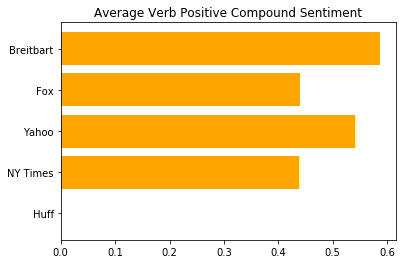

In [404]:
#huff
huffpost_verb = pos_df(huffpost_dataframe, ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
#plt.barh(["Huff"],avg_neg_pos(huffpost_verb["Compound Sentiment"])[0], color = "purple")
plt.barh(["Huff"],avg_neg_pos(huffpost_verb["Compound Sentiment"])[1], color = "orange")
#nytimes
nytimes_verb = pos_df(nytimes_dataframe,["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
#plt.barh(["NY Times"],avg_neg_pos(nytimes_verb["Compound Sentiment"])[0], color = "purple")
plt.barh(["NY Times"],avg_neg_pos(nytimes_verb["Compound Sentiment"])[1], color = "orange")
#yahoo
yahoo_verb = pos_df(yahoo_dataframe,["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
#plt.barh(["Yahoo"],avg_neg_pos(yahoo_verb["Compound Sentiment"])[0], color = "purple")
plt.barh(["Yahoo"],avg_neg_pos(yahoo_verb["Compound Sentiment"])[1], color = "orange")
#foxnews 
foxnews_verb = pos_df(foxnews_dataframe,["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
#plt.barh(["Fox"],avg_neg_pos(foxnews_verb["Compound Sentiment"])[0], color = "purple")
plt.barh(["Fox"],avg_neg_pos(foxnews_verb["Compound Sentiment"])[1], color = "orange")
#breitbart
breitbart_verb = pos_df(breitbart_dataframe,["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]).drop_duplicates("Vocab")
#plt.barh(["Breitbart"],avg_neg_pos(breitbart_verb["Compound Sentiment"])[0], color = "purple")
plt.barh(["Breitbart"],avg_neg_pos(breitbart_verb["Compound Sentiment"])[1], color = "orange")

#display
plt.title("Average Verb Positive Compound Sentiment");
plt.savefig('verb_avgposcomp.png');

## tfidf

In [ ]:
#from nltk import sentiment
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
corpus = {to_string(foxnews_lemm), to_string(huffpost_lemm), 
         to_string(yahoo_lemm), to_string(nytimes_lemm), to_string(breitbart_lemm)}


In [ ]:
vectorizer = CountVectorizer()

vectorizer.fit(corpus)

print(vectorizer.vocabulary_)

In [ ]:
vector = vectorizer.transform(corpus)

In [ ]:
print(vector.shape)
print(type(vector))
print(vector.toarray())

In [ ]:
c = foxnews_dataframe.merge(huffpost_dataframe, on = "Vocab")
d = c.merge(yahoo_dataframe, on = "Vocab")
e = d.merge(nytimes_dataframe, on = "Vocab")
f = e.merge(breitbart_dataframe, on = "Vocab")
f["Vocab"].value_counts()

# testing

In [ ]:
"PRON" in huffpost_lemm

In [ ]:
def delete_word(token_list, term):
    for i in token_list:
        if i in term:
            a.remove(i)
    return token_list

In [ ]:
#huff
wordcloud_huff = WordCloud(max_words = 15, background_color = "white").generate(to_string(delete_word(huffpost_lemm, ["Trump", "Clinton"])))
plt.imshow(wordcloud_huff, interpolation='bilinear')
plt.axis("off")
plt.show;

In [ ]:
a = delete_word(foxnews_lemm, ["Trump"])
a = delete_word(foxnews_lemm, ["Clinton"])

#fox
wordcloud_fox = WordCloud(max_words = 15, background_color = "white").generate(to_string(delete_word(a)))
plt.imshow(wordcloud_fox, interpolation='bilinear')
plt.axis("off")
plt.show;

In [ ]:
wordcloud.to_file("img/first_review.png")

### sentiment analysis

In [68]:
import nltk
nltk.download('sentiwordnet')
nltk.download('vader_lexicon')
from nltk.corpus import sentiwordnet as swn

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/sehyunhwang/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sehyunhwang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [63]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [65]:
ff = sid.polarity_scores(foxnews)
print(ff)
hh = sid.polarity_scores(huffpost)
print(hh)
bb = sid.polarity_scores(breitbart)
print(bb)
nn = sid.polarity_scores(nytimes)
print(nn)
yy = sid.polarity_scores(yahoo)
yy

{'neg': 0.089, 'neu': 0.798, 'pos': 0.112, 'compound': 0.9702}
{'neg': 0.15, 'neu': 0.748, 'pos': 0.102, 'compound': -0.9941}
{'neg': 0.089, 'neu': 0.806, 'pos': 0.105, 'compound': 0.7222}
{'neg': 0.109, 'neu': 0.76, 'pos': 0.131, 'compound': 0.9895}


{'neg': 0.046, 'neu': 0.877, 'pos': 0.077, 'compound': 0.9848}

In [80]:
ff_lemm = sid.polarity_scores(to_string(f))
sid.polarity_scores(to_string(y))

{'neg': 0.107, 'neu': 0.716, 'pos': 0.178, 'compound': 0.9967}

In [104]:

with open("foxnews_vocab","w+") as f_vocab:
    f_vocab.write(to_string(f))